### Initialization

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import eyelinkio

### Loading `edf` file with `eyelinkio`

In [2]:
# define path to data
edf_path = '/Users/baharsener/Desktop/TG_2011.edf'

# read edf and print metadata
edf = eyelinkio.read_edf(edf_path)
print(edf)
#thinks it is missing samples? is one eent one file?

<EDF | TG_2011.edf> 
  Version: EYELINK II 1 
  Eye: LEFT_EYE 
  Pupil unit: PUPIL_AREA 
  Sampling frequency: 500.0 Hz 
  Calibrations: 2 
  Length: 1346.498 seconds 



In [3]:
# inpsect structure of edf
edf.keys()

dict_keys(['info', 'discrete', 'times', 'samples'])

In [4]:
edf['info']

{'meas_date': datetime.datetime(2024, 10, 18, 10, 5, 7),
 'version': 'EYELINK II 1',
 'camera': 'Eyelink GL Version 1.2 Sensor=AH7',
 'serial': 'CLG-BGB36',
 'camera_config': 'BGB36200.SCD',
 'sfreq': 500.0,
 'ps_units': 'PUPIL_AREA',
 'eye': 'LEFT_EYE',
 'sample_fields': ['xpos', 'ypos', 'ps'],
 'edfapi_version': '4.2.1197.0 MacOS X   standalone Sep 27 2024',
 'screen_coords': array([1280, 1024]),
 'calibrations': [{'onset': np.float64(0.0),
   'eye': 'left',
   'validation': array([( 640., 512.,  1.13,   -8.7,   42.4),
          ( 640.,  87.,  0.76,  -17.5,  -16.6),
          ( 640., 936.,  1.03,  -12.5,  -36.5),
          (  77., 512.,  0.71,   -6.4,   26.4),
          (1202., 512.,  1.53,   24.8,   48.6),
          ( 144., 138.,  0.8 ,   10.7,   27.5),
          (1135., 138.,  0.87,    5.2,   33.2),
          ( 144., 885.,  0.96,    9.2,   35.4),
          (1135., 885., 10.35, -256.1, -189.6)],
         dtype=[('point_x', '<f8'), ('point_y', '<f8'), ('offset', '<f8'), ('diff_x', '<

### `edf['discrete']`

In [5]:
edf['discrete'].keys()

#edf['discrete']['messages']: time, message
# edf['discrete']['buttons']: time, button
# edf['discrete']['inputs']: time, input

dict_keys(['messages', 'buttons', 'inputs', 'fixations', 'saccades', 'blinks'])

In [6]:
# inspect fixation data structure
edf['discrete']['fixations'][0] # first fixation
# structure: eye (1=left eye), start time, end time, average x, average y

np.void((0.0, 0.01, 0.21, 662.2000122070312, 533.7999877929688), dtype=[('eye', '<f8'), ('stime', '<f8'), ('etime', '<f8'), ('axp', '<f8'), ('ayp', '<f8')])

In [7]:
# inspect blink data structure
edf['discrete']['blinks'][0] # first blink
# structure: eye (1=left eye), start time, end time

np.void((0.0, 2.216, 2.222), dtype=[('eye', '<f8'), ('stime', '<f8'), ('etime', '<f8')])

In [8]:
# inspect saccade data structure
edf['discrete']['saccades'][0] # first saccade
# structure: eye, start time, end time, gaze start x, gaze start y, gaze end x, gaze end y, peak velocity (unit?)

np.void((0.0, 0.212, 0.25, 660.0999755859375, 530.5, 557.2999877929688, 466.29998779296875, 191.0), dtype=[('eye', '<f8'), ('stime', '<f8'), ('etime', '<f8'), ('sxp', '<f8'), ('syp', '<f8'), ('exp', '<f8'), ('eyp', '<f8'), ('pv', '<f8')])

### convert `edf` to `pandas` `df`

In [9]:
df = edf.to_pandas()
df.keys()

dict_keys(['discrete', 'samples', 'calibrations'])

In [10]:
df['samples'].head() #x, y, pupil size

,xpos,ypos,ps
0,662.599976,527.599976,233.0
1,662.700012,527.799988,233.0
2,662.799988,528.200012,233.0
3,663.000000,528.599976,233.0
4,663.099976,529.000000,233.0


In [11]:
# edf['samples'] contain all samples that were recorded during the session 
# to prove that:
num_samples = edf['samples'].shape[1]
sample_freq = edf['info']['sfreq']
time = num_samples / sample_freq # time should be close/equal to the duration of the session
print(time, edf['times'][-1])

1346.498 1346.496


In [12]:
df['calibrations']

,point_x,point_y,offset,diff_x,diff_y,eye,model,onset
0,640.0,512.0,1.13,-8.7,42.4,left,HV9,0.0
1,640.0,87.0,0.76,-17.5,-16.6,left,HV9,0.0
2,640.0,936.0,1.03,-12.5,-36.5,left,HV9,0.0
3,77.0,512.0,0.71,-6.4,26.4,left,HV9,0.0
4,1202.0,512.0,1.53,24.8,48.6,left,HV9,0.0
5,144.0,138.0,0.80,10.7,27.5,left,HV9,0.0
6,1135.0,138.0,0.87,5.2,33.2,left,HV9,0.0
7,144.0,885.0,0.96,9.2,35.4,left,HV9,0.0
8,1135.0,885.0,10.35,-256.1,-189.6,left,HV9,0.0
0,640.0,512.0,0.77,-20.9,-8.1,left,HV9,0.0


In [13]:
df['discrete']['messages'].head()

,stime,msg
0,0.0,DISPLAY_COORDS 0 0 1279 1023
1,0.0,"!CAL \n>>>>>>> CALIBRATION (HV9,P-CR) FOR LEFT..."
2,0.0,!CAL Calibration points:
3,0.0,"!CAL 4.8, -23.3 1898, 5251"
4,0.0,"!CAL 4.6, -33.3 2163, 8856"


In [14]:
df['discrete']['buttons'].head()

,stime,buttons
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [15]:
df['discrete']['inputs'].head()

,stime,input
0,0.0,127.0
1,0.0,127.0
2,0.0,127.0
3,0.0,127.0
4,0.0,127.0


In [16]:
df['discrete']['fixations'].head()

,eye,stime,etime,axp,ayp
0,LEFT_EYE,0.010,0.210,662.200012,533.799988
1,LEFT_EYE,0.252,0.388,560.299988,466.899994
2,LEFT_EYE,0.422,2.170,628.400024,510.899994
3,LEFT_EYE,2.318,2.760,597.400024,521.299988
4,LEFT_EYE,2.792,3.168,555.599976,531.200012


In [17]:
df['discrete']['blinks'].head()

,eye,stime,etime
0,LEFT_EYE,2.216,2.222
1,LEFT_EYE,10.692,10.756
2,LEFT_EYE,19.648,19.686
3,LEFT_EYE,31.098,31.176
4,LEFT_EYE,51.568,51.630


In [18]:
df['discrete']['saccades'].head()

,eye,stime,etime,sxp,syp,exp,eyp,pv
0,LEFT_EYE,0.212,0.250,660.099976,530.500000,557.299988,466.299988,191.000000
1,LEFT_EYE,0.390,0.420,560.200012,469.700012,620.500000,508.700012,172.500000
2,LEFT_EYE,2.172,2.316,630.599976,524.000000,575.099976,546.500000,1109.900024
3,LEFT_EYE,2.762,2.790,598.200012,526.000000,548.400024,538.900024,136.500000
4,LEFT_EYE,3.170,3.204,558.200012,529.000000,668.099976,490.100006,217.000000


### example: average data sampled every second and plot hetamap

In [19]:
# data wrangling
data = df['samples'].copy()
data['time'] = edf['times']
data.head()

,xpos,ypos,ps,time
0,662.599976,527.599976,233.0,0.000
1,662.700012,527.799988,233.0,0.002
2,662.799988,528.200012,233.0,0.004
3,663.000000,528.599976,233.0,0.006
4,663.099976,529.000000,233.0,0.008


In [20]:
# convert time to integer to represent each second
data['time_sec'] = data['time'].astype(int) # always rounding down

# group by time_sec and calculate the mean for 'xpos', 'ypos', 'pupil'
data_grouped = data.groupby('time_sec')[['xpos', 'ypos', 'ps']].mean().reset_index()
data_grouped = data_grouped.dropna()
data_grouped.head()

,time_sec,xpos,ypos,ps
0,0,619.219801,506.396000,251.716
1,1,632.840201,509.971401,265.462
2,2,573.434879,587.827015,290.692
3,3,604.082001,511.400199,239.678
4,4,901.059001,503.748799,269.336


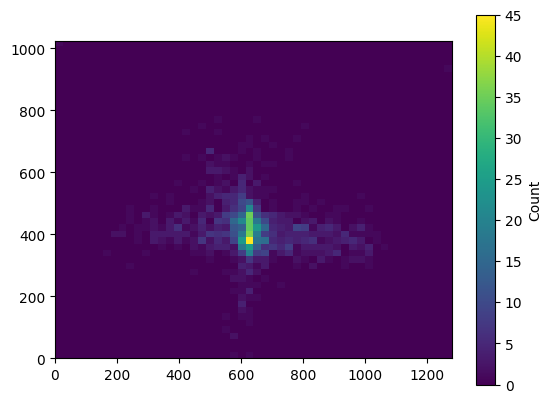

In [21]:
# create 2D array for x and y positions
heatmap, xedges, yedges = np.histogram2d(data_grouped['xpos'], data_grouped['ypos'], bins=50)
screen_coords = edf['info']['screen_coords']

# Plot the heatmap using imshow
plt.imshow(heatmap.T, origin='lower', cmap='viridis',
           extent=[0, screen_coords[0], 0, screen_coords[1]])
plt.colorbar(label='Count')

# note: the heatmap is not corrected with calibration info
#the screen coordinates seem off! My screen is 0,1024 for x and 0, 768 for y! 
#So this looks like is actually fixed in the middle
#But I am not sure how long of a time it is plotting really, is it all?
#it could be given there is a 2 second fixation before e